# ObsID : 0827211301, SRCNUM : 20, Instru : EPN
Not on Simbad. Previous observation of the source **ObsID : 0945020137, SRCNUM : 21**

## ESASky

https://sky.esa.int/esasky/?target=52.73769389063616%20-28.634488186049&hips=GALEX+GR6%2F7+AIS+color&fov=0.182241278518&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- IAU name : 4XMM J033056.9-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('P*PNS*SRSPEC*.FTZ')[0])


1 spectrum  in use
 
Spectral Data File: P0827211301PNS003SRSPEC0014.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.725e-03 +/- 6.245e-04 (38.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.522e+04 sec
 Using fit statistic: chi
 Using Background File                P0827211301PNS003BGSPEC0014.FTZ
  Background Exposure Time: 2.522e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY4.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0827211301PNS003SRCARF0014.FTZ



In [11]:
n_cts = 2.522e+04*3.725e-03

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 93.9445

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (12) ignored in spectrum #     1



(-0.5, 856.5, 659.5, -0.5)

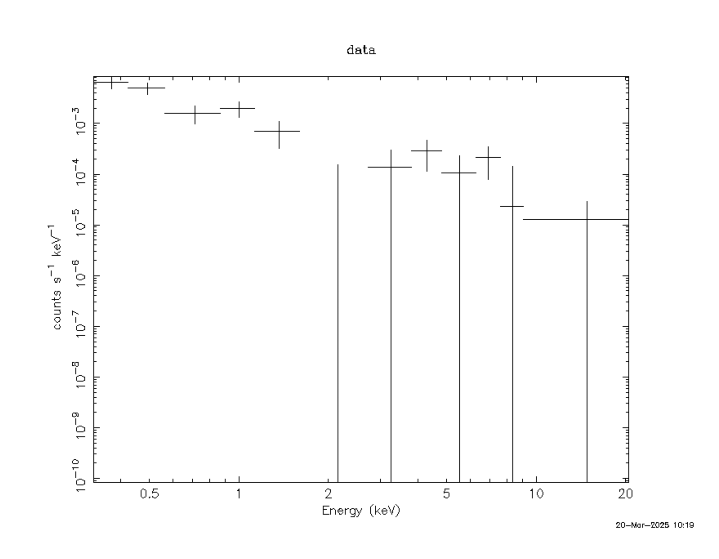

In [5]:
img = plt.imread(glob.glob('*Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.785559e+11     using 11 bins.

Te

(-0.5, 846.5, 667.5, -0.5)

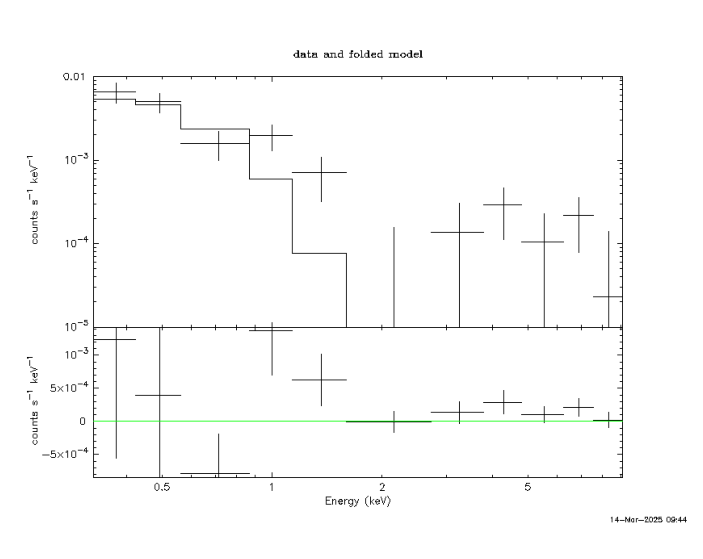

In [27]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.914912e+10     using 11 bins.

Test statistic : Chi-Squared              3.914912e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
47.5277      0.500119     -2   0.000940913       198.211   2.12155e-06
29.8749      395925       -2   0.000304379       199.358   1.25203e-05
26.5085      169243       -2   8.72440e-05       199.361   1.72635e-05
2

(-0.5, 857.5, 672.5, -0.5)

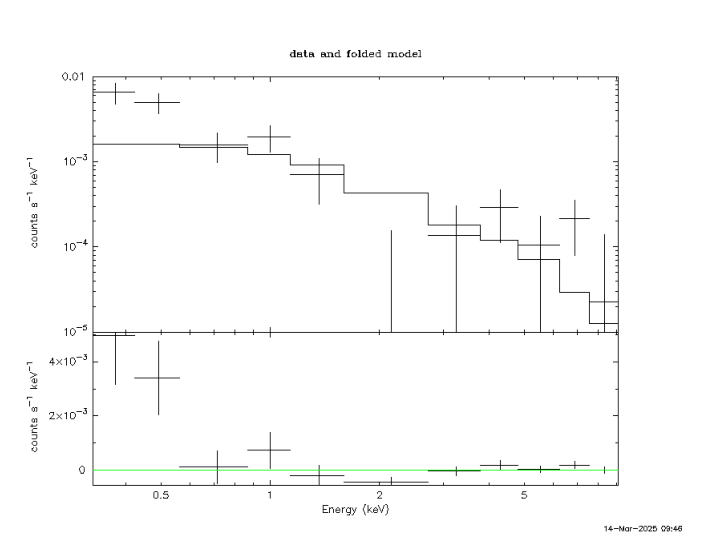

In [29]:
img = plt.imread(glob.glob('*Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.934849e+09     using 11 bins.

Test statistic : Chi-Squared              8.934849e+09     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
40.9852      2.67422      -1      0.883031      0.393356   3

(-0.5, 856.5, 675.5, -0.5)

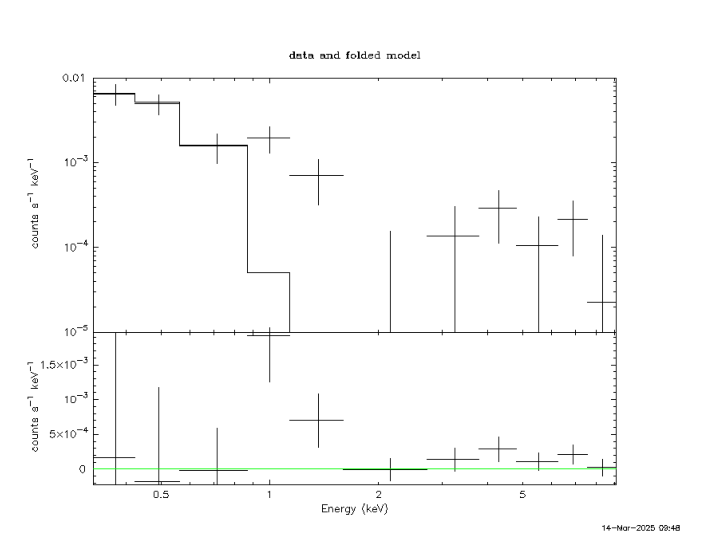

In [33]:
img = plt.imread(glob.glob('*Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model (Third best fit)

In [8]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.805364e+11     using 11 bins.

Test statistic : Chi-Squared              1.805364e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
47.1531      0.346649     -1      0.456876      0.297698   1.67252e-06
43.3782      267439        0     0.0694993      0.233894   1.57746e-06
41.4384      559057        0    0.00397313      0.270625   1.62824e-06

(-0.5, 851.5, 672.5, -0.5)

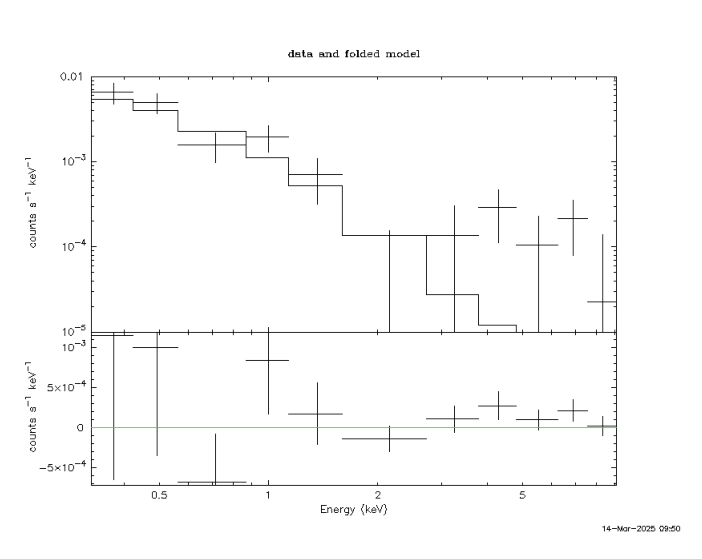

In [35]:
img = plt.imread(glob.glob('*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model (Best fit)

In [9]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.169788e+12     using 11 bins.

Test statistic : Chi-Squared              1.169788e+12     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
44.9822      8136.51  

(-0.5, 855.5, 675.5, -0.5)

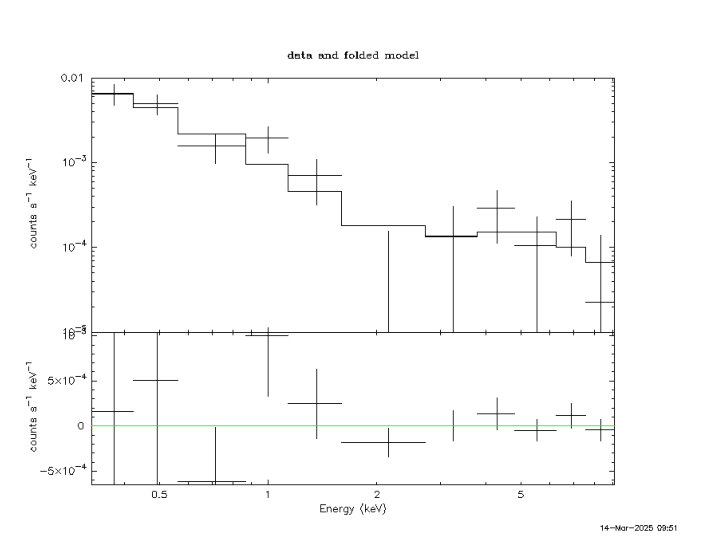

In [37]:
img = plt.imread(glob.glob('*Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung + Powerlaw model (Second best fit)

In [10]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.824139e+11     using 11 bins.

Test statistic : Chi-Squared              3.824139e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
47.3515      5636.08 

(-0.5, 856.5, 681.5, -0.5)

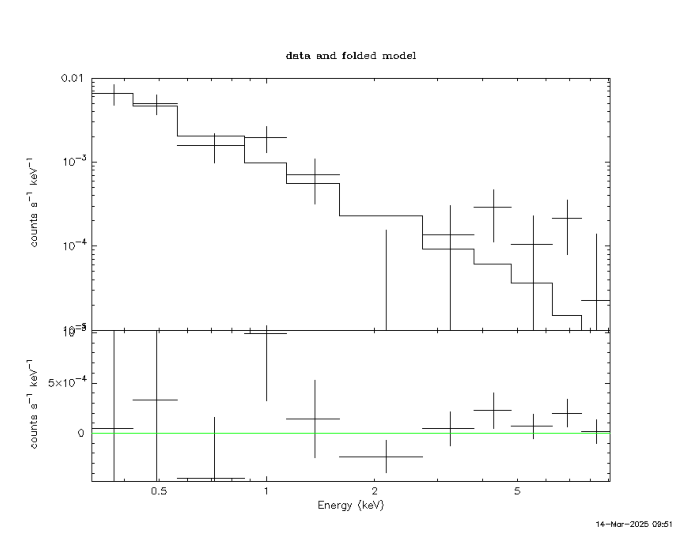

In [39]:
img = plt.imread(glob.glob('*Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 52.7376939°
- DEC = -28.6344882°

52.74 -28.63

**Column density :** nH = 2*10^20 cm^-2

In [12]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw ((Third best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 100542.40817378448

bremss
(tbabs) : 4773703325344185.0

apec
(tbabs) : 7.414101235100893e+16

powerlaw ((Third best fit)
(tbabs) : 2197035.733784182

bbody+powerlaw (Best fit)
(tbabs) : 1.4692903599304627e+20

bremss+powerlaw (Second best fit)
(tbabs) : 6.457582856429767e+20


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Black body + Powerlaw`` with Chi-squared = 6.7917 using 11 bins: **3.2796e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Bremss + Powerlaw`` with Chi-squared = 9.3167 using 11 bins: **6.4459e-14 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Powerlaw`` with Chi-squared = 10.8458 using 11 bins: **3.9066e-14 ergs/cm^2/s**.

In [3]:
Flux_bbp = 3.2796e-13  # ergs/cm^2/s
Flux_bp = 6.4459e-14  # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Black body + Powerlaw : F_x-ray = {Flux_bbp} ergs/cm^2/s")
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")

X-ray flux : 
Black body + Powerlaw : F_x-ray = 3.2796e-13 ergs/cm^2/s
Bremss + Powerlaw : F_x-ray = 6.4459e-14 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [4]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [5]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bbp/F} ergs/cm^2/s")
print(f"Bremss + Powerlaw : F_x-ray/F_optical = {Flux_bp/F} ergs/cm^2/s")

X-ray flux / Optical flux ratio : 
Black body + Powerlaw : F_x-ray/F_optical = 5.9515704482211955 ergs/cm^2/s
Bremss + Powerlaw : F_x-ray/F_optical = 1.169753261135169 ergs/cm^2/s


## Luminosity
No distance or parallax data is available on ESASky.

In [8]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bbp = 4*np.pi*Flux_bbp*(d1_cm)**2 # erg/s
L2_bbp = 4*np.pi*Flux_bbp*(d2_cm)**2 # erg/s
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s


print(color.BOLD+"Luminosity of a galacitc source with d=[1 pc - 30 kpc] :"+color.END)
print(f"Black body + Powerlaw : L_x-ray = [{L1_bbp}, {L2_bbp}] erg/s")
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bbp = 4*np.pi*Flux_bbp*(d1_cm)**2 # erg/s
L2_bbp = 4*np.pi*Flux_bbp*(d2_cm)**2 # erg/s
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Black body + Powerlaw : L_x-ray = [{L1_bbp}, {L2_bbp}] erg/s")
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")

Luminosity of a galacitc source with d=[1 pc - 30 kpc] :
Black body + Powerlaw : L_x-ray = [3.924082620716813e+25, 3.9240826207168125e+31] erg/s
Bremss + Powerlaw : L_x-ray = [7.712600367385812e+24, 7.712600367385811e+30] erg/s

Luminosity of an extragalactic source with d=[1 Mpc - 10 Gpc] :
Black body + Powerlaw : L_x-ray = [3.9240826207168133e+37, 3.924082620716814e+45] erg/s
Bremss + Powerlaw : L_x-ray = [7.712600367385812e+36, 7.712600367385812e+44] erg/s


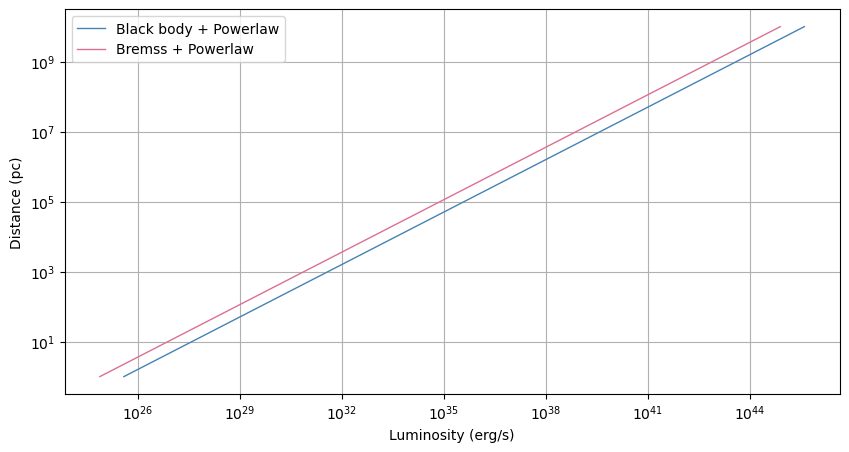

In [10]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bbp = 4*np.pi*Flux_bbp*(d_cm)**2 # erg/s
L_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_bbp,D_pc, lw=1, color='steelblue', label="Black body + Powerlaw")
plt.plot(L_bp,D_pc, lw=1, color='palevioletred', label="Bremss + Powerlaw")
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.legend(loc='best')
plt.xscale("log")
plt.yscale("log")
plt.grid()